In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import numpy as np

In [25]:
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.2989, 0.5870, 0.1140])

In [2]:
# convolution 2D
def conv2d(img, kernel, padding='same'):
    # Error handling
    if kernel.shape[0] != kernel.shape[1]:
        print("Use square filter!")
        return None
    
    if kernel.shape[0]%2 == 0 and kernel.shape[1]%2 == 0:
        print("filter size has to be odd")
        return None
    
    # Create result matrix
    result = np.zeros_like(img)
    
    # Calculate kernel size
    kernel_size = kernel.shape[0]
    
    # same padding
    if padding=='same':
        pad_size = int((kernel_size - 1) / 2)
    else:
        pad_size = 0
    img = np.pad(img, pad_size, mode='constant')
    
    # convolution
    width, height = img.shape
    offset = int(kernel_size / 2)
    for x in range(offset, width-offset):
        for y in range(offset, height-offset):
            result[x-offset, y-offset] = np.sum(img[x-offset:x+offset+1, y-offset:y+offset+1] * kernel)
            
    return result

In [22]:
def LoG(sigma=1, stencil=19):
    """
        Parameters:
            1. sigma : the width of the Gaussian kernel
            2. stencil : the overall image size of the filter (default 19x19)
            
        Return:
            1. a numpy array with the filter values
    """
    center_idx = stencil // 2
    x_tmp = np.arange(stencil) - center_idx
    y_tmp = np.arange(stencil) - center_idx
    x, y = np.meshgrid(x_tmp, y_tmp)
    
    LoG_filter = (-1/(np.pi * (sigma**4))) * (1-(x**2 + y**2)/2*(sigma**2)) * np.exp(-(x**2 + y**2)/2*(sigma**2))
    return LoG_filter

In [40]:
def filterImg(img, fil):
    """
        Paramters:
            1. img : input image
            2. fil : filter
            
        Return:
            1. the filtered image
    """
    return conv2d(img.copy(), fil, padding="same")

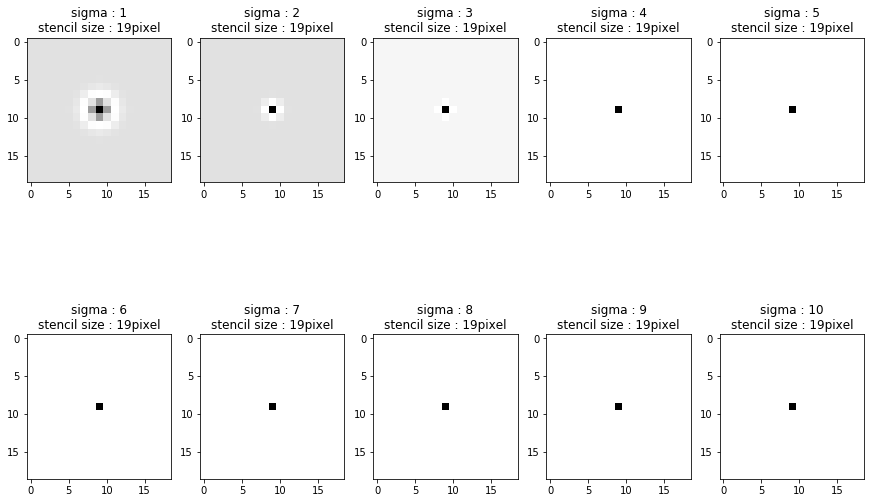

In [23]:
# Log filters
sigmas = [sigma+1 for sigma in range(10)]
fig = plt.figure(figsize= (15,10))
for sigma in sigmas:
    LoG_filter = LoG(sigma=sigma)
    ax = fig.add_subplot(2, 5, sigma)
    ax.imshow(LoG_filter, cmap='gray')
    ax.set_title("sigma : %d\nstencil size : %dpixel" %(sigma, 19))

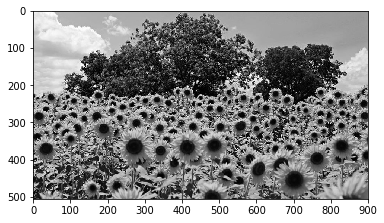

In [26]:
# read image
img = mpl.image.imread("sunflower.jpg")
img = rgb2gray(img)
plt.imshow(img, cmap='gray')

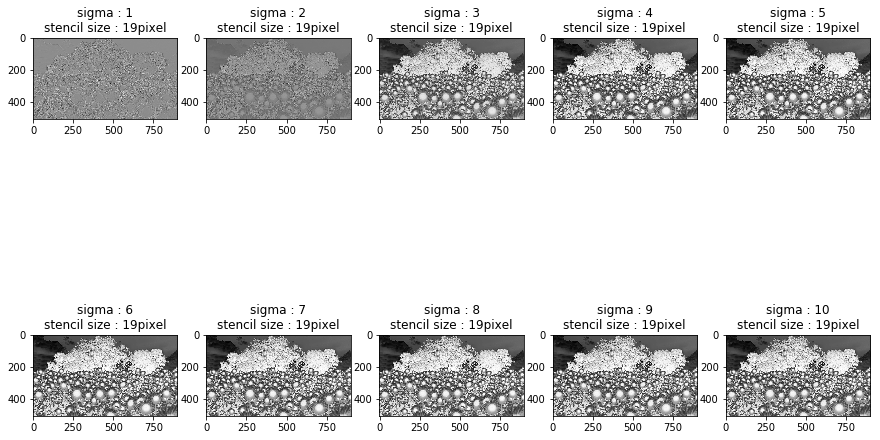

In [41]:
# Log filters
sigmas = [sigma+1 for sigma in range(10)]
fig = plt.figure(figsize= (15,10))
for sigma in sigmas:
    LoG_filter = LoG(sigma=sigma)
    result = filterImg(img, LoG_filter)
    ax = fig.add_subplot(2, 5, sigma)
    ax.imshow(result, cmap='gray')
    ax.set_title("sigma : %d\nstencil size : %dpixel" %(sigma, 19))